In [14]:
from warnings import filterwarnings
filterwarnings("ignore")

from scipy.fft import fftshift, ifftshift, fft2, ifft2 
from numpy.linalg import norm
import numpy as np
from TV_funcs import *

import matplotlib.pyplot as plt
%matplotlib inline

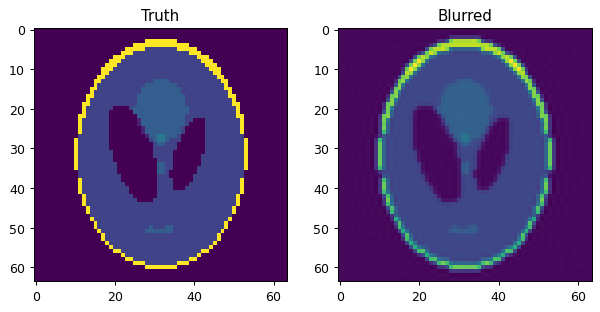

In [15]:
np.random.seed(1)

p_0 = 64
img = phantom(p_0)[::-1]

omega = 1e-3
gam = 1e-3
lam = 1e0

k = np.arange(-p_0/2,p_0/2)
k1,k2 = np.meshgrid(k,k)
ix = int(np.argwhere((k1**2 + k2**2 == 0).reshape(-1,1).flatten('F')))
din = (1/(k1**2 + k2**2)).flatten('F')
din[ix] = 1.
din = din.reshape(p_0,p_0,order='F')
XF  = np.exp(-omega*(k1**2 + k2**2))

y_blur = ifft2(ifftshift(XF*fftshift(fft2(img))))
y_blur_noisy = y_blur + gam*np.random.randn(p_0,p_0)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,5), dpi = 90)
ax[0].imshow(img)
ax[0].set_title("Truth")
ax[1].imshow(y_blur_noisy.real)
ax[1].set_title("Blurred")
plt.show()

## Monolithic version

In [16]:
m_ls, m, Cd = VBL_TV(XF, y_blur_noisy, din, k1, k2, gam, lam, return_LS = True, verbose = True)

m_ls_transformed = m_transform(m_ls, p_0, din, k1, k2, order='C')
m_transformed = m_transform(m, p_0, din, k1, k2, order='C')

iteration = 1
iteration = 2
iteration = 3


In [17]:
print('|beta - m_ls|/|beta| = ', norm(img.flatten() - m_ls_transformed.flatten())/norm(img.flatten()))
print('|beta - m|/|beta| = ',    norm(img.flatten() - m_transformed.flatten())/norm(img.flatten()))

|beta - m_ls|/|beta| =  0.03260606921253513
|beta - m|/|beta| =  0.022200838798961745


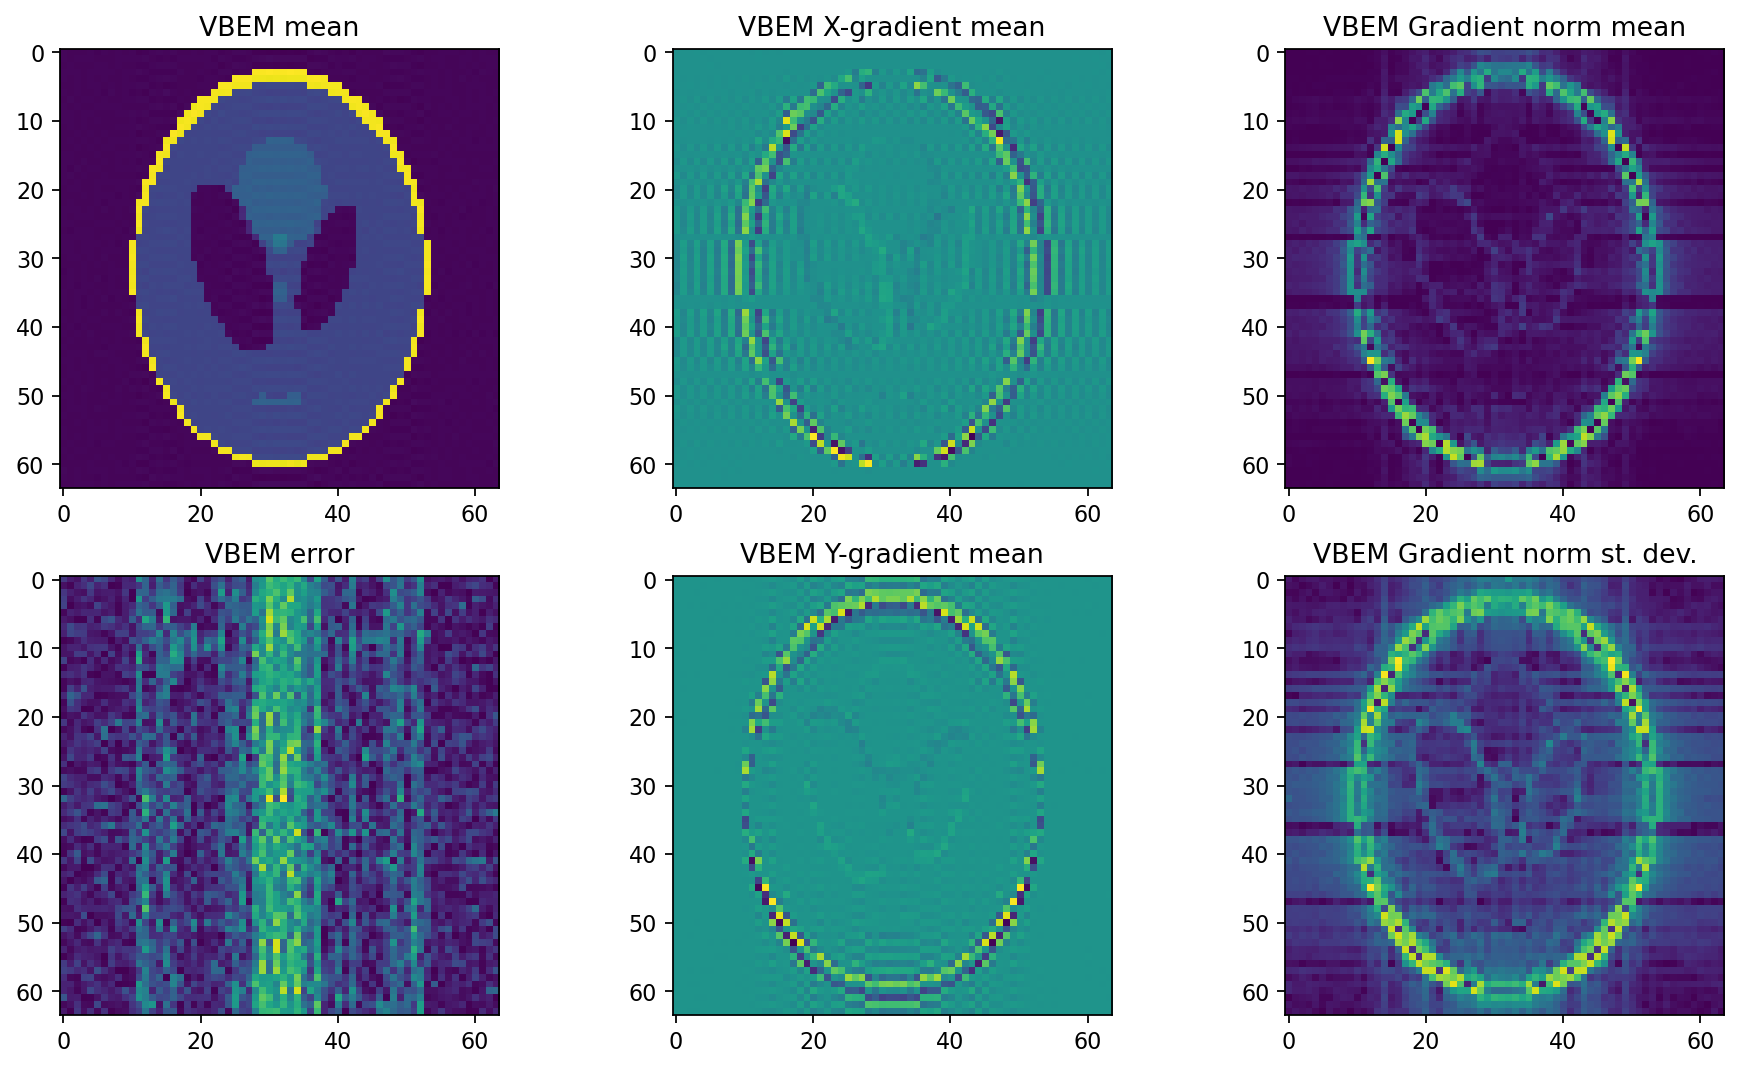

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14,8), dpi = 160)

ax[0,0].imshow(m_transformed)
ax[0,0].set_title("VBEM mean")

ax[1,0].imshow(abs(img - m_transformed))
ax[1,0].set_title("VBEM error")

ax[0,1].imshow(m[:p_0**2].reshape(p_0,p_0))
ax[0,1].set_title("VBEM X-gradient mean")

ax[1,1].imshow(m[p_0**2:-1].reshape(p_0,p_0))
ax[1,1].set_title("VBEM Y-gradient mean")

ax[0,2].imshow(np.sqrt(m[:p_0**2]**2 + m[p_0**2:-1]**2).reshape(p_0,p_0))
ax[0,2].set_title("VBEM Gradient norm mean")

ax[1,2].imshow((np.sqrt(Cd[:p_0**2] + Cd[p_0**2:-1])).reshape(p_0,p_0))
ax[1,2].set_title("VBEM Gradient norm st. dev.")

plt.show()

## Recursive version

In [19]:
m_ls, m, Cd = recursive_VBL_TV(XF, y_blur_noisy, 10, din, k1, k2, gam, lam, return_LS = True, verbose = True)

m_ls_transformed = m_transform(m_ls, p_0, din, k1, k2, order='F')
m_transformed = m_transform(m, p_0, din, k1, k2, order='F')

M = 410
iteration = 1
iteration = 2
iteration = 3
iteration = 4
iteration = 5
iteration = 6
iteration = 7
iteration = 8
iteration = 9


In [20]:
print('|beta - m_ls|/|beta| = ', norm(img.flatten() - m_ls_transformed.flatten())/norm(img.flatten()))
print('|beta - m|/|beta| = ',    norm(img.flatten() - m_transformed.flatten())/norm(img.flatten()))

|beta - m_ls|/|beta| =  0.6357555148024673
|beta - m|/|beta| =  0.3574293966908409


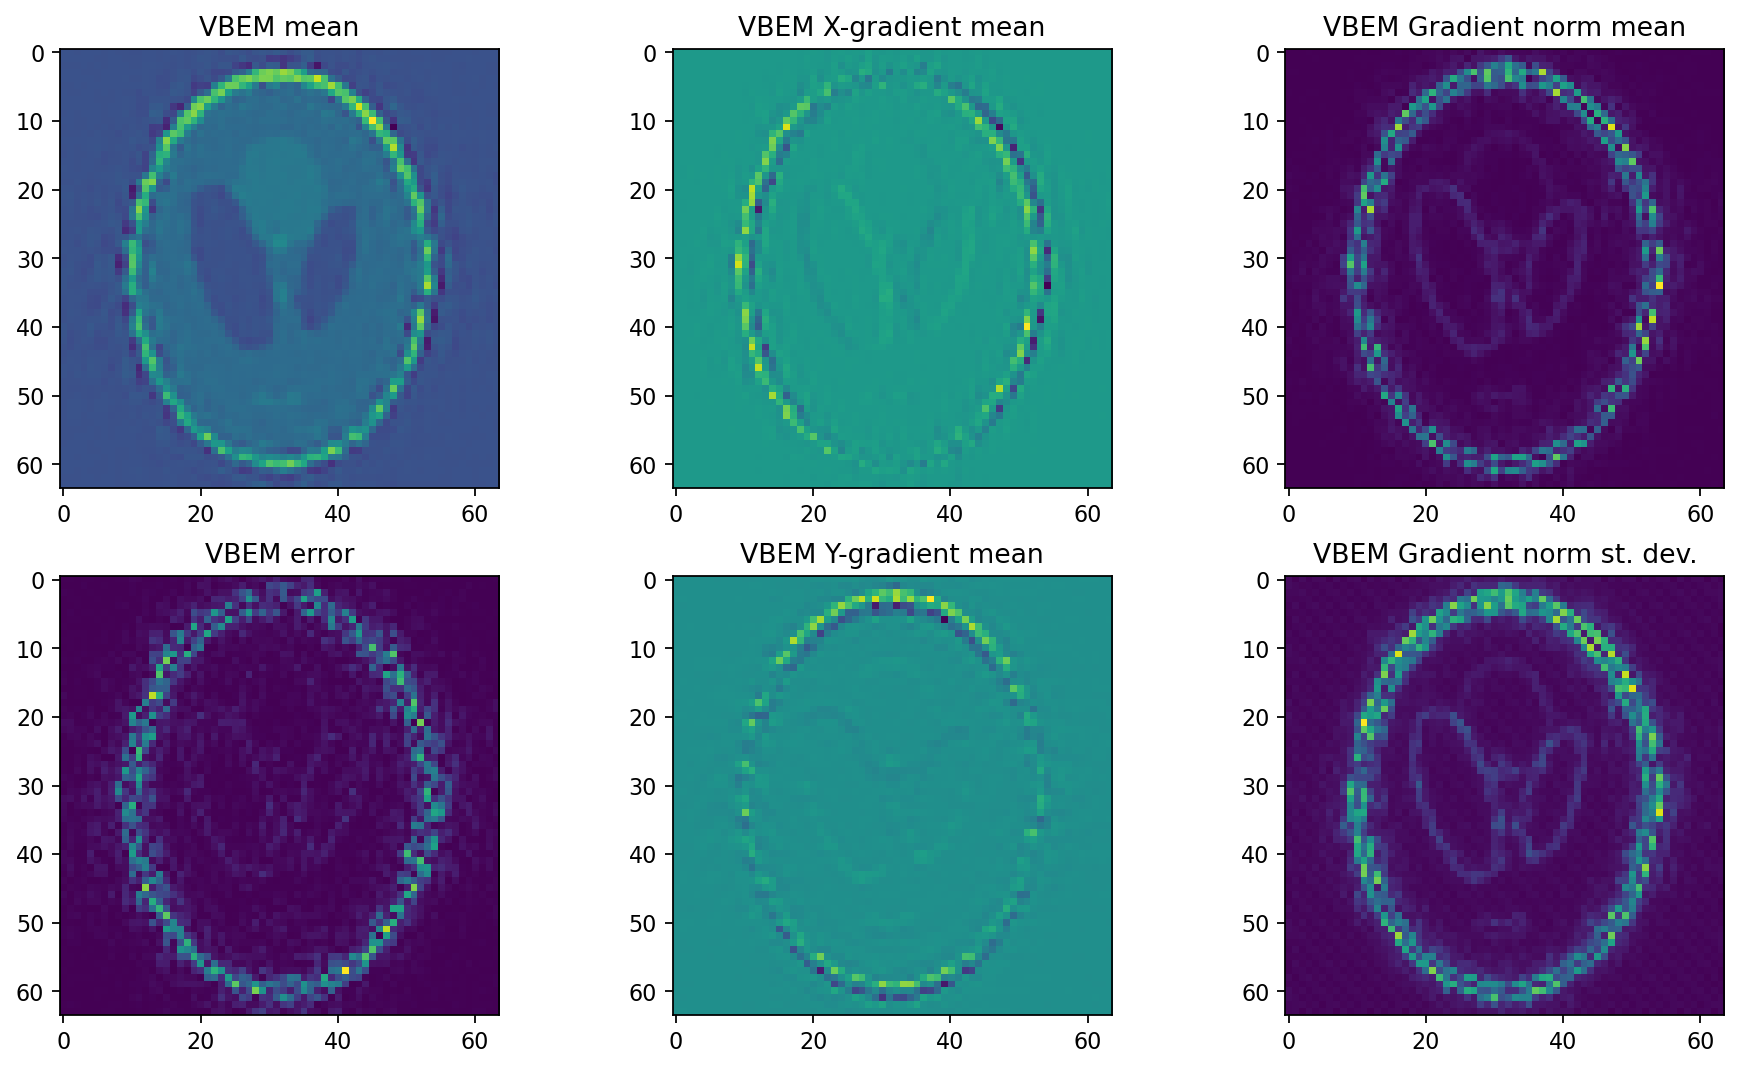

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14,8), dpi = 160)

ax[0,0].imshow(m_transformed)
ax[0,0].set_title("VBEM mean")

ax[1,0].imshow(abs(img - m_transformed))
ax[1,0].set_title("VBEM error")

ax[0,1].imshow(m[:p_0**2].reshape(p_0,p_0, order='F'))
ax[0,1].set_title("VBEM X-gradient mean")

ax[1,1].imshow(m[p_0**2:-1].reshape(p_0,p_0, order='F'))
ax[1,1].set_title("VBEM Y-gradient mean")

ax[0,2].imshow(np.sqrt(m[:p_0**2]**2 + m[p_0**2:-1]**2).reshape(p_0,p_0, order='F'))
ax[0,2].set_title("VBEM Gradient norm mean")

ax[1,2].imshow((np.sqrt(Cd[:p_0**2] + Cd[p_0**2:-1])).reshape(p_0,p_0, order='F'))
ax[1,2].set_title("VBEM Gradient norm st. dev.")

plt.show()